In [27]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from datasets.nih_cxr import NIHCXRDataset

data_dir = '../data/dummy_data_cxr'

In [6]:
train_dataset = NIHCXRDataset(data_dir, split='train', binary=True)
val_dataset = NIHCXRDataset(data_dir, split='val', binary=True)
test_dataset = NIHCXRDataset(data_dir, split='test', binary=True)

# Check the label distribution

In [25]:
def get_labels(dataset):
    labels = [dataset.labels_df.loc[image_file] for image_file in dataset.image_files]
    labels = [np.array(label) for label in labels]
    labels = [int(label.any()) for label in labels]
    return labels


def label_dist(dataset):
    labels = get_labels(dataset)
    ax = sns.barplot(y=labels, ci=None)
    ax.set(ylim=(0, 1), title='Percentage of abnormalities')
    plt.show()

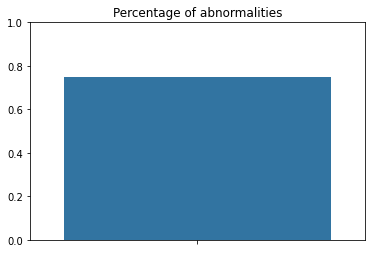

In [22]:
label_dist(train_dataset)

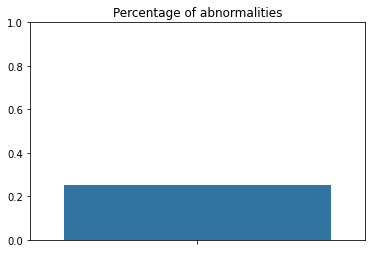

In [23]:
label_dist(val_dataset)

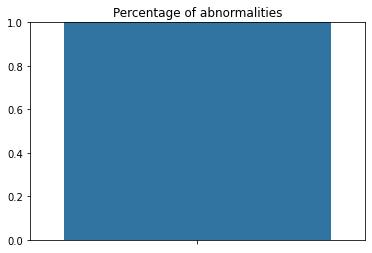

In [24]:
label_dist(test_dataset)

# Spot-check correctness of dataset labels

In [28]:
def get_images_labels(dataset):
    images = dataset.image_files
    labels = get_labels(dataset)
    df = pd.DataFrame({'image': images, 'label': labels})
    return df

In [29]:
get_images_labels(train_dataset).head(10)

,image,label
0,00000001_001.jpg,1
1,00000001_002.jpg,1
2,00000001_000.jpg,1
3,00000002_000.jpg,0


In [30]:
get_images_labels(val_dataset).head(10)

,image,label
0,00000006_000.jpg,0
1,00000017_001.jpg,0
2,00000017_000.jpg,1
3,00000017_002.jpg,0


In [31]:
get_images_labels(test_dataset).head(10)

,image,label
0,00000003_002.jpg,1
1,00000003_000.jpg,1
2,00000003_003.jpg,1
3,00000003_001.jpg,1
